In [1]:
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

In [90]:
def add_coastlines(figax):
    ax = figax[1]
    ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(spatial_index_values=None,figax=None,plot_options={'projection':None,'transform':None},show=True):

    if figax is None:
        fig,ax = plt.subplots(1,subplot_kw=plot_options)
        ax.set_global()
        ax.coastlines()
        figax = [fig,ax]
    else:
        ax = figax[1]
    
    if spatial_index_values is not None:
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        siv_triang = tri.Triangulation(lons,lats,intmat)
        ax.triplot(siv_triang,transform=plot_options['transform'])
    
    if show:
        plt.show()
        
    return figax

In [87]:
# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

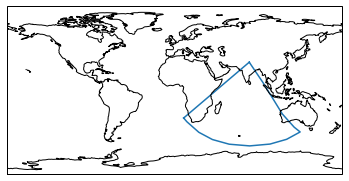

In [91]:
figax = add_coastlines(plt.subplots(1,subplot_kw=plot_options))

siv = 0 # STARE Spatial Index Value, geolocation bits are 0, resolution level is 0.

figax = hello_plot([siv],figax,plot_options)


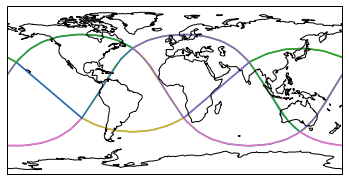

In [99]:
level_zero_increment = 1 << 59
figax = add_coastlines(plt.subplots(subplot_kw={'projection':proj,'transform':transf}))

for siv in range(0,8*level_zero_increment,level_zero_increment):
    hello_plot([siv],figax,plot_options,show=False)
plt.show()

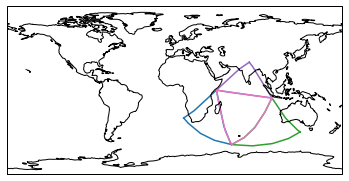

In [100]:
level_one_increment = 1 << 57
figax = add_coastlines(plt.subplots(subplot_kw={'projection':proj,'transform':transf}))

# Iterate over resolution level 1 triangles making up siv = 0.
for siv in range(0,4*level_one_increment,level_one_increment):
    siv = siv + 1 # set the resolution level to 1
    hello_plot([siv],figax,plot_options,show=False)
plt.show()